In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler, scale

In [3]:
'''
I will be using opensource datasets to implement and explaining algorithms
in python (because using company/org data is prohibitied)
Here absenteeism data of employees from uci.edu is used

Mean: The mean of average is the one number that best represents all of the data points.

Variance: Variance is calculated as sum of squares of subtraction of number and mean of 
numbers divided by number of data points

Standard Deviation: It is the square root of Variance.

'''

#use read_csv to load dataset from csv to pandas dataframe

df = pd.read_csv('absent_data_uc.csv', delimiter = ';')

In [4]:
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [7]:
# Lets consider following columns and filter out other columns from the dataframe
'''
Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day
Weight
Height
Body mass index
Absenteeism time in hours
'''
df = df[['Transportation expense',
         'Distance from Residence to Work',
         'Service time',
         'Age',
         'Work load Average/day ',
         'Weight',
         'Height',
         'Body mass index',
         'Absenteeism time in hours']]

In [8]:
#Rename column names to simpler form

df.rename(columns={
    'Transportation expense': 'Transportation',
    'Distance from Residence to Work': 'Distance',
    'Service time': 'Service',
    'Work load Average/day ': 'Workload',
    'Body mass index': 'BMI',
    'Absenteeism time in hours': 'AbsentHours'
},inplace=True)

c:\python3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289,36,13,33,239.554,90,172,30,4
1,118,13,18,50,239.554,98,178,31,0
2,179,51,18,38,239.554,89,170,31,2
3,279,5,14,39,239.554,68,168,24,4
4,289,36,13,33,239.554,90,172,30,2


In [10]:
#Before applying mathematical function on data, we need to convert the data type to float
df = df.astype(np.float64)

In [11]:
#Calculating Mean, Median, Variance and Standard Deviation using numpy libs

print('Mean/Average Transportation : ', np.mean(df['Transportation'].values))
print('Median Transportation : ', np.median(df['Transportation'].values))
print('Variance Transportation : ', np.var(df['Transportation'].values))
print('Standard Deviation Transportation : ', np.std(df['Transportation'].values))

Mean/Average Transportation :  221.32972972972973
Median Transportation :  225.0
Variance Transportation :  4476.542629656684
Standard Deviation Transportation :  66.90696996320102


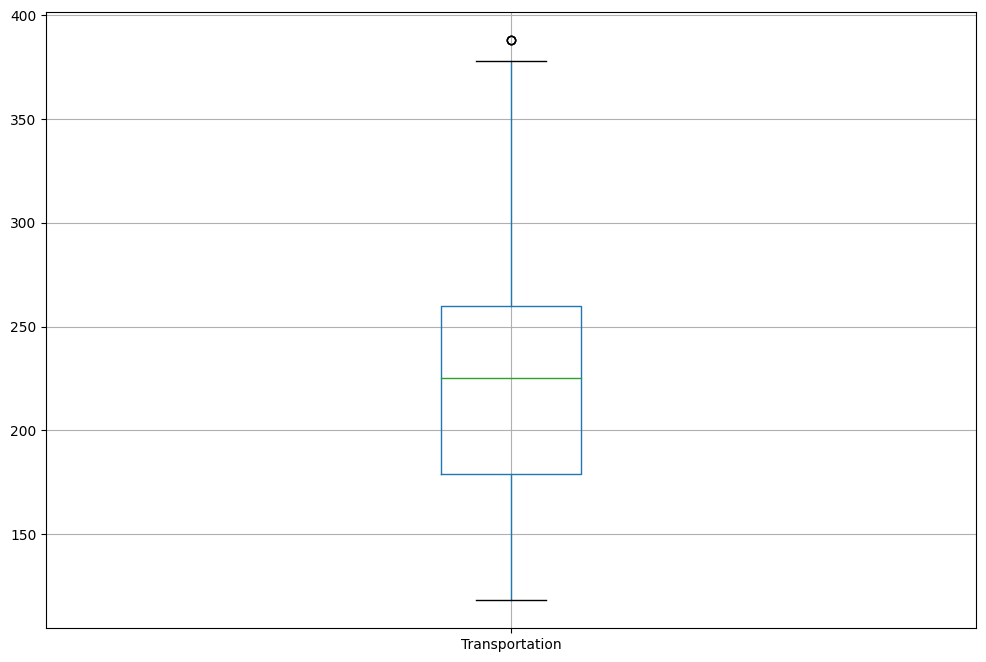

In [12]:
#Viewing Statistical information as numbers is sometimes difficult to understand
#the big picture of data.

#Another way to using graphs to better understand the data. BoxPlot is very useful for
#statistical visulations

df.boxplot(column=['Transportation'], figsize=(12,8))

plt.show()

In [ ]:
'''
In above boxplot
1. The line at centre of box is median
2. The bottom and top edges of the box represent quantile 1 and quantile 3
   the bottom edge is 25th percentile and the top edge is 75th percentile of data
3. The size of the box is inter-quartile range IQR i.e., Q3-Q1
4. Beyond the inter-quartile range top whisker (Q3 + 1.5 * IQR) and bottom whisker (Q1 - 1.5 * IQR)
5. Outside whisker points represented as little dots are outliers.

'''

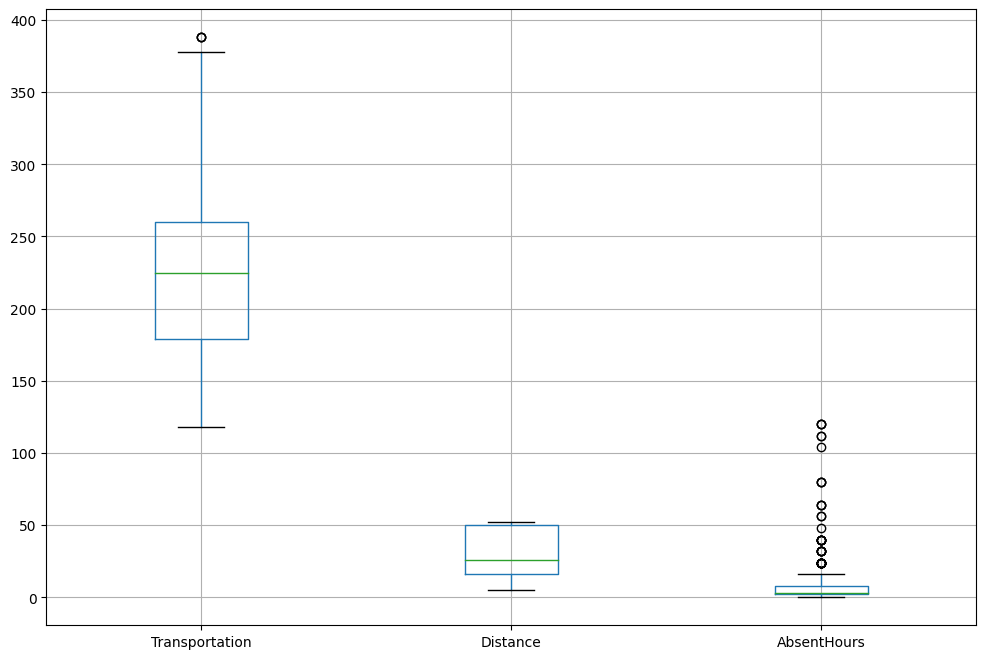

In [15]:
#Lets plot Transportation, Distance and AbsentHours
#The mean and standard deviation of AbsentHours is very different from other two

df.boxplot(column=['Transportation', 'Distance', 'AbsentHours'], figsize=(12,8))
plt.show()

In [16]:
'''
2.2.3 Standardization of data (from Report)
First center the data at 0 mean by subtracting the mean from every data point (X – mean(x))
And then divide by standard deviation. It can be done on one field at a time
X_Scaled = (X – mean(x)) / std(x)

'''

scaled_df = pd.DataFrame()

#Scale Transportation and add to scaled_df
scaled_df['Transportation'] = (df['Transportation'] - np.mean(df['Transportation'].values)) / \
            np.std(df['Transportation'].values)

#Scale Distance
scaled_df['Distance'] = (df['Distance'] - np.mean(df['Distance'].values)) / \
            np.std(df['Distance'].values)

#Scale Transportation
scaled_df['AbsentHours'] = (df['AbsentHours'] - np.mean(df['AbsentHours'].values)) / \
            np.std(df['AbsentHours'].values)

In [17]:
scaled_df.head()

,Transportation,Distance,AbsentHours
0,1.011408,0.429556,-0.219511
1,-1.544379,-1.121694,-0.519767
2,-0.632665,1.441240,-0.369639
3,0.861947,-1.661258,-0.219511
4,1.011408,0.429556,-0.369639


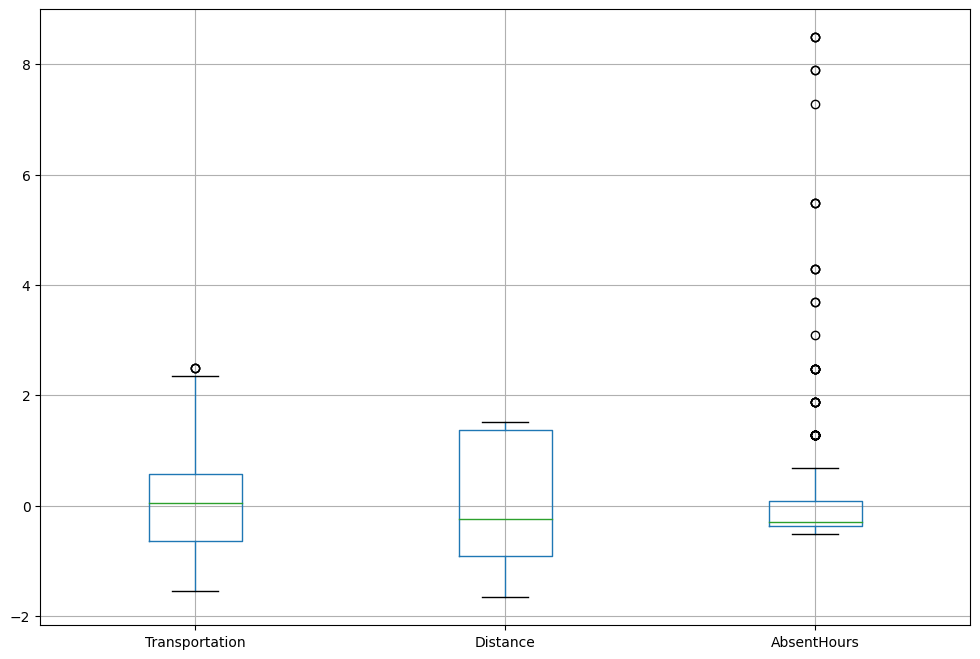

In [18]:
#Lets Plot all three columns from scaled df and check if these feilds are comparable

scaled_df.boxplot(column=['Transportation', 'Distance', 'AbsentHours'], figsize=(12,8))
plt.show()